In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
concatenated_df = pd.read_csv('C:/Users/MSI KATANA/Desktop/practice ML/data engineering cw by inupa B/Data-Engineering-HCHO-gas-prediction-/concatenated_data.csv')
concatenated_df

,HCHO Reading,Location,Current Date,Next Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000263,Nuwara Eliya,2019-01-01,2019-01-02
3,0.000263,Colombo,2019-01-02,2019-01-03
4,0.000006,"Deniyaya, Matara",2019-01-02,2019-01-03
...,...,...,...,...
12777,0.000158,Kurunegala,2023-12-30,2023-12-31
12778,0.000117,Jaffna,2023-12-30,2023-12-31
12779,0.000117,"Bibile, Monaragala",2023-12-31,2024-01-01
12780,0.000065,Kurunegala,2023-12-31,2024-01-01


In [3]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(concatenated_df['HCHO Reading'])

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Based on the p-value, decide on stationarity
if adf_test[1] > 0.05:
    print("The series is likely non-stationary and may need differencing.")
else:
    print("The series is likely stationary.")

ADF Statistic: -11.898220
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
The series is likely stationary.


In [4]:
# Convert 'Current Date' to datetime and set as index
concatenated_df['Current Date'] = pd.to_datetime(concatenated_df['Current Date'])
concatenated_df.set_index('Current Date', inplace=True)

# Output the first few rows and the index to verify changes
df_head_after = concatenated_df.head()
df_index_info = concatenated_df.index

df_head_after, df_index_info

(              HCHO Reading          Location   Next Date
 Current Date                                            
 2019-01-01        0.000197           Colombo  2019-01-02
 2019-01-01        0.000197  Deniyaya, Matara  2019-01-02
 2019-01-01        0.000263      Nuwara Eliya  2019-01-02
 2019-01-02        0.000263           Colombo  2019-01-03
 2019-01-02        0.000006  Deniyaya, Matara  2019-01-03,
 DatetimeIndex(['2019-01-01', '2019-01-01', '2019-01-01', '2019-01-02',
                '2019-01-02', '2019-01-02', '2019-01-03', '2019-01-03',
                '2019-01-03', '2019-01-04',
                ...
                '2023-12-28', '2023-12-29', '2023-12-29', '2023-12-29',
                '2023-12-30', '2023-12-30', '2023-12-30', '2023-12-31',
                '2023-12-31', '2023-12-31'],
               dtype='datetime64[ns]', name='Current Date', length=12782, freq=None))

In [5]:
from statsmodels.tsa.stattools import adfuller

# Running ADF test on the 'HCHO Reading' of one of the locations
result = adfuller(concatenated_df[concatenated_df['Location'] == 'Colombo']['HCHO Reading'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -4.643981930882711
p-value: 0.00010709010569367779


In [6]:
# Selecting the data for the model
colombo_data = concatenated_df[concatenated_df['Location'] == 'Colombo']['HCHO Reading']

In [7]:
from statsmodels.tsa.arima.model import ARIMA


# Fit the ARIMA model
arima_model = ARIMA(colombo_data, order=(1, 0, 1))
arima_result = arima_model.fit()

# Print out the summary of the model
model_summary = arima_result.summary()

# Display the model summary
model_summary

# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)
forecast

C:\Users\MSI KATANA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MSI KATANA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MSI KATANA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MSI KATANA\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2024-01-01    0.000129
2024-01-02    0.000131
2024-01-03    0.000133
2024-01-04    0.000134
2024-01-05    0.000135
2024-01-06    0.000136
2024-01-07    0.000137
2024-01-08    0.000138
2024-01-09    0.000139
2024-01-10    0.000139
Freq: D, Name: predicted_mean, dtype: float64

In [12]:
# Forecasting the next 100 periods
forecast = arima_result.forecast(steps=100)
forecast

2024-01-01    0.000129
2024-01-02    0.000131
2024-01-03    0.000133
2024-01-04    0.000134
2024-01-05    0.000135
                ...   
2024-04-05    0.000143
2024-04-06    0.000143
2024-04-07    0.000143
2024-04-08    0.000143
2024-04-09    0.000143
Freq: D, Name: predicted_mean, Length: 100, dtype: float64

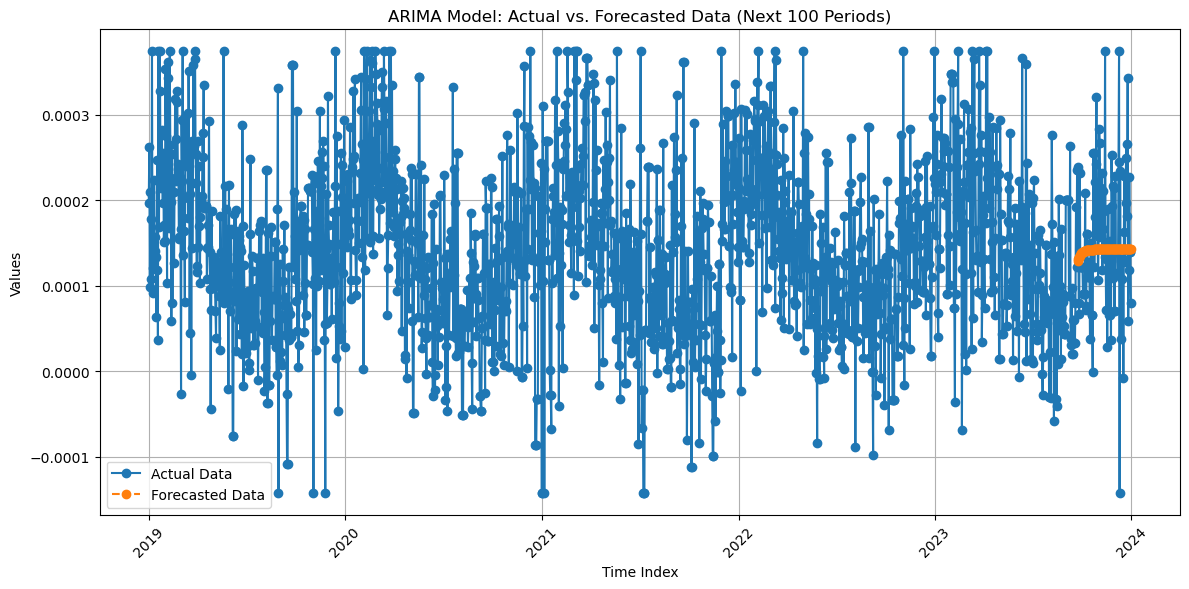

In [13]:
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

# Extract actual data
actual_data = colombo_data 


forecast_values = arima_result.forecast(steps=100)

# Create the visualization
plt.figure(figsize=(12, 6)) 

plt.plot(actual_data.index, actual_data, marker='o', label='Actual Data')
plt.plot(actual_data.index[-100:], forecast_values, marker='^', linestyle='--', label='Forecasted Data')  # Plot forecast on last 10 points

plt.xlabel('Time Index')
plt.ylabel('Values')
plt.title('ARIMA Model: Actual vs. Forecasted Data (Next 100 Periods)')

# Add legend for clarity
plt.legend()

# Rotate x-axis labels 
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:


from math import sqrt  # Import for calculating square root
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Import metrics

# Calculate evaluation metrics
rmse = sqrt(mean_squared_error(actual_data, arima_result.forecast(steps=len(actual_data))))  # Root Mean Squared Error
mae = mean_absolute_error(actual_data, arima_result.forecast(steps=len(actual_data)))  # Mean Absolute Error
mse = mean_squared_error(actual_data, arima_result.forecast(steps=len(actual_data)))  # Mean Squared Error

# Print evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)



Root Mean Squared Error (RMSE): 9.962370028930635e-05
Mean Absolute Error (MAE): 7.920665691174068e-05
Mean Squared Error (MSE): 9.924881659333538e-09
